In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import statistics

In [2]:
metadata = pd.read_csv("D:\\archive (1)\\id_metadata.csv", sep = '\t')
metadata.head()

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
0,0009fFIM1eYThaPg,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947
1,0010xmHR6UICBOYT,27szvF97Tu95GxN98N52fy,46.0,2013,0.591,0.513,7.0,0.0,0.263,172.208,325096
2,002Jyd0vN4HyCpqL,273lBFpxUCwisTpdnF9cVb,31.0,1974,0.319,0.925,2.0,1.0,0.658,157.630,285693
3,006TYKNjNxWjfKjy,1qZgergQ41vaD4zBf3AKXR,33.0,2017,0.432,0.979,7.0,1.0,0.162,90.008,332867
4,007LIJOPQ4Sb98qV,6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,0.357,0.708,9.0,1.0,0.470,123.904,326067


In [44]:
mean = statistics.mean(metadata['popularity'])
std_dev = statistics.stdev(metadata['popularity'])
print(mean, std_dev)
count = len(list(filter(lambda x: x > mean+std_dev*2.5, metadata['popularity'])))

print(count)

35.08060840677594 14.756257502969774
881


In [46]:
threshold = mean + std_dev*2.5

# Get indices of elements above the threshold
indices = [index for index, value in enumerate(metadata['popularity']) if value > threshold]

print(f"Indices of elements above {threshold}: {indices}")

Indices of elements above 71.97125216420037: [244, 345, 465, 466, 472, 803, 870, 1318, 1366, 1446, 1608, 1613, 1740, 1833, 2070, 2385, 2693, 2838, 2988, 3140, 3153, 3780, 3803, 4012, 4523, 4618, 5445, 5460, 5869, 5905, 6145, 6446, 6797, 6892, 6893, 6904, 6966, 6985, 6994, 7141, 7284, 7361, 7562, 8105, 8220, 8342, 8409, 8533, 8639, 8784, 9247, 9528, 9596, 9927, 10000, 10376, 10594, 10678, 10732, 11071, 11125, 11279, 11571, 11912, 12052, 12115, 12183, 12197, 12470, 12643, 12646, 12747, 12750, 12805, 12833, 13015, 13265, 13284, 13321, 13372, 13394, 13462, 13647, 13767, 14146, 14177, 14197, 14198, 14289, 14359, 14488, 14729, 15010, 15191, 15232, 15248, 15397, 15447, 15491, 15506, 15779, 16200, 16203, 16299, 16420, 16754, 16774, 16849, 16885, 16932, 17395, 17473, 17556, 17623, 17806, 17841, 17851, 18137, 18380, 18387, 18463, 18572, 18666, 18683, 18861, 18939, 19089, 19117, 19150, 19365, 19386, 19539, 19685, 20102, 20431, 20460, 20465, 20466, 20931, 21074, 21090, 21278, 21344, 21398, 21404, 

In [42]:
info = pd.read_csv("D:\\archive (1)\\id_information.csv", sep = '\t')
info.head()

,id,artist,song,album_name
0,0009fFIM1eYThaPg,Cheryl,Rain on Me,3 Words
1,0010xmHR6UICBOYT,Oddisee,After Thoughts,The Beauty in All
2,002Jyd0vN4HyCpqL,Blue Öyster Cult,ME 262,Secret Treaties
3,006TYKNjNxWjfKjy,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded)
4,007LIJOPQ4Sb98qV,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...


In [43]:
for i in indices:
    print(info['song'][i])

It Ain't Safe
Burn It To The Ground
Y cómo es él?
Boom Boom Pow
Patience
If It Wasn't For You
Robbers
Unbroken
Implicit Demand for Proof
All I Can Think About Is You
Try
Duro Igual Concreto
Hounds of Love
Una storia importante
Help Is on the Way
My Wish
Sometimes When We Touch
Sinnerman - felix da housecat's heavenly house mix
Let's Go (The Royal We)
Run My Mouth
Always
Feelin' Myself
Blue Train
I Just Want to Make Love to You
Miss Independent
I'll Come Too
Anna Molly
If I Could Turn Back Time
Burn Out
This Is War
Please
Station to Station
Tapestry
Alone
Comeback Story
As It Was
Rapper's Delight
Famous Blue Raincoat
Donk
In Bloom - Nevermind Version
Me Duele Amarte
I Sat by the Ocean
Take You Home
Not Afraid Anymore
Rock Steady
Fumando Vamos a Casa
Meet Mr. NICEGUY
Sadnecessary
Got The Time
Sleepless
Is This Love - 2018 Remaster
Ode to Sleep
Lucky
I Don't Believe in Love
Don't Call Me White
You and Whose Army?
Love Hurts
Quisiera Saber
She Bangs the Drums
1973 - Acoustic
Someday
If I G

In [ ]:
metadata['popularity'][39647]

In [7]:
len(info)

109269

In [47]:
all_track_details = []

for i in indices:
    valence = metadata['valence'][i]
    arousal = metadata['energy'][i]
    track_name = info['song'][i]
    artist = info['artist'][i]
    id = info['id'][i]
    spotify_id = metadata['spotify_id'][i]
    album_name = info['album_name'][i]

    all_track_details.append({
            'track': track_name,
            'artist': artist,
            'album': album_name,
            'spotify_id': spotify_id,
            'id': id,
            'valence': valence,
            'arousal': arousal,  
        })
    

In [48]:
print(len(all_track_details))

881


In [49]:
print(all_track_details[0])

{'track': 'Lucky', 'artist': 'Jason Mraz', 'album': 'We Sing. We Dance. We Steal Things.', 'spotify_id': '0IktbUcnAGrvD03AWnz3Q8', 'id': '09I4YQcdsw1PVXh8', 'valence': 0.721, 'arousal': 0.417}


In [50]:
json_data = json.dumps(all_track_details, indent=4)  # indent=4 for pretty formatting

# Save the JSON string to a file
with open('top_881_track_metadata.json', 'w') as json_file:
    json_file.write(json_data)

print("track_list saved to track_list.json")

track_list saved to track_list.json


TypeError: text() missing 1 required positional argument: 's'

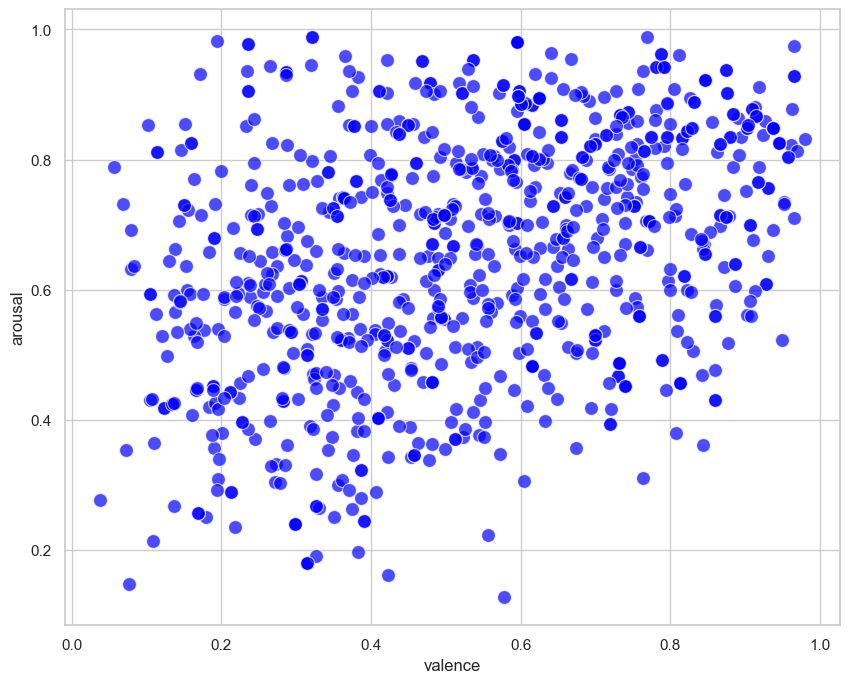

In [53]:
df = pd.DataFrame(all_track_details)

# Set up the plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.set(style="whitegrid")  # Set the style

# Create the scatter plot
scatter = sns.scatterplot(
    x='valence', 
    y='arousal', 
    data=df, 
    s=100,  # Size of the points
    color='blue',  # Color of the points
    alpha=0.7  # Transparency of the points
)

# Add labels to each point
for i, row in df.iterrows():
    plt.text(
        row['valence'] + 0.01,  # x-coordinate offset
        row['arousal'] + 0.01,  # y-coordinate offset
        fontsize=9,  # Font size
        fontweight='bold',  # Font weight
        color='darkblue'  # Text color
    )

# Add titles and labels
plt.title('Valence-Arousal Space of Songs', fontsize=16, fontweight='bold')
plt.xlabel('Valence', fontsize=14)
plt.ylabel('Arousal', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
with open('track_list.json', 'r') as json_file:
    data = json.load(json_file)

print(data)

[{'name': 'Blinding Lights', 'id': '0VjIjW4GlUZAMYd2vXMi3b', 'artists': ['The Weeknd'], 'url': 'https://open.spotify.com/track/0VjIjW4GlUZAMYd2vXMi3b'}, {'name': 'Shape of You', 'id': '7qiZfU4dY1lWllzX7mPBI3', 'artists': ['Ed Sheeran'], 'url': 'https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3'}, {'name': 'Someone You Loved', 'id': '7qEHsqek33rTcFNT9PFqLf', 'artists': ['Lewis Capaldi'], 'url': 'https://open.spotify.com/track/7qEHsqek33rTcFNT9PFqLf'}, {'name': 'As It Was', 'id': '4LRPiXqCikLlN15c3yImP7', 'artists': ['Harry Styles'], 'url': 'https://open.spotify.com/track/4LRPiXqCikLlN15c3yImP7'}, {'name': 'Starboy', 'id': '7MXVkk9YMctZqd1Srtv4MB', 'artists': ['The Weeknd', 'Daft Punk'], 'url': 'https://open.spotify.com/track/7MXVkk9YMctZqd1Srtv4MB'}, {'name': 'Sunflower - Spider-Man: Into the Spider-Verse', 'id': '0RiRZpuVRbi7oqRdSMwhQY', 'artists': ['Post Malone', 'Swae Lee'], 'url': 'https://open.spotify.com/track/0RiRZpuVRbi7oqRdSMwhQY'}, {'name': 'Sweater Weather', 'id': '2QjOHC

In [14]:
trackname_list = [item['name'] for item in data]
print(trackname_list)

['Blinding Lights', 'Shape of You', 'Someone You Loved', 'As It Was', 'Starboy', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Sweater Weather', 'One Dance', 'STAY (with Justin Bieber)', 'Believer', 'Heat Waves', 'Perfect', 'Dance Monkey', 'lovely (with Khalid)', "Say You Won't Let Go", 'Closer', 'rockstar (feat. 21 Savage)', 'Something Just Like This', 'Riptide', 'Watermelon Sugar', 'Señorita', 'Take Me To Church', 'Another Love', "Don't Start Now", 'Counting Stars', 'Photograph', 'Lucid Dreams', 'Yellow', 'I Wanna Be Yours', 'Circles', "God's Plan", 'Cruel Summer', 'Bohemian Rhapsody - Remastered 2011', "Can't Hold Us (feat. Ray Dalton)", 'goosebumps', 'Thinking out Loud', 'bad guy', 'Shallow', 'The Night We Met', 'Love Yourself', 'Thunder', 'All of Me', 'Die For You', 'Wake Me Up', 'Demons', 'The Hills', 'Stressed Out', 'Viva La Vida', 'No Role Modelz', 'Without Me', 'Just the Way You Are', 'HUMBLE.', 'Mr. Brightside', 'Let Her Go', '7 rings', 'When I Was Your Man', 'Lose Yourse

In [17]:
name_id_dict = {}
for name in trackname_list:
    match = info[info['song'] == name]

    if not match.empty:
        name_id_dict[name] = match['id'].values[0]

print(name_id_dict)
print(len(name_id_dict))

{'Shape of You': '7bbCXbz5k2bdp6Kx', 'As It Was': '07A8gIjr1oCpQQQL', 'Sweater Weather': 'Em3COFnWwp8xh0B3', 'One Dance': 'zim4pwqavGLYPuhL', 'Believer': 'IKPkZLNa6KhaXXze', 'Perfect': '1QT1nSftBM9clk7r', "Say You Won't Let Go": 'e7mmfsHpJ1bmAojH', 'Closer': '0j6BA5LAT5RbxBEc', 'Something Just Like This': 'ZQKP2CwIxV9QEfyp', 'Riptide': 'HDBCf0YnKZLKBXEE', 'Señorita': 'KdIlc98fK04B1ErV', 'Another Love': 'USLM5pkhFI0MwCPx', 'Counting Stars': 'XRs0d5l2y78JSxrZ', 'Photograph': 'Cjss6W8NGlsjbMOE', 'Lucid Dreams': 'LkpZOWQt3SGE01IR', 'Yellow': 'XiD9PkZO8X0vD2Hj', 'I Wanna Be Yours': 'TO3cZBWQE1GRRXy4', 'Circles': '4aAXLFWXmSqqeygg', "God's Plan": '4ZAUjbPxfWaacu4C', 'Cruel Summer': '1OzemFVoxJ5ZTZAT', 'Bohemian Rhapsody - Remastered 2011': 'NCD8XAG4Q0Nbyr0l', "Can't Hold Us (feat. Ray Dalton)": 'Z8TDrjbCjHt0Gcz3', 'Thinking out Loud': 'pIRLBI4JHPx88OPj', 'Shallow': '1AUZEne1B6g06WSK', 'The Night We Met': 'sb8ULf4OH9FatySd', 'Love Yourself': 'UPLD6S6eyvsZN4gr', 'Thunder': '0ShtmfqyvW1hKjw7', 

In [18]:
track_details = []

for track_name, track_id in name_id_dict.items():
    match = metadata[metadata['id'] == track_id]
    
    if not match.empty:
        valence = match['valence'].values[0]
        energy = match['energy'].values[0] 
        
        track_details.append({
            'track': track_name,
            'id': track_id,
            'valence': valence,
            'arousal': energy  
        })

In [20]:
print(track_details)
print(len(track_details))

[{'track': 'Shape of You', 'id': '7bbCXbz5k2bdp6Kx', 'valence': 0.931, 'arousal': 0.652}, {'track': 'As It Was', 'id': '07A8gIjr1oCpQQQL', 'valence': 0.155, 'arousal': 0.154}, {'track': 'Sweater Weather', 'id': 'Em3COFnWwp8xh0B3', 'valence': 0.176, 'arousal': 0.297}, {'track': 'One Dance', 'id': 'zim4pwqavGLYPuhL', 'valence': 0.391, 'arousal': 0.61}, {'track': 'Believer', 'id': 'IKPkZLNa6KhaXXze', 'valence': 0.239, 'arousal': 0.67}, {'track': 'Perfect', 'id': '1QT1nSftBM9clk7r', 'valence': 0.159, 'arousal': 0.5579999999999999}, {'track': "Say You Won't Let Go", 'id': 'e7mmfsHpJ1bmAojH', 'valence': 0.494, 'arousal': 0.557}, {'track': 'Closer', 'id': '0j6BA5LAT5RbxBEc', 'valence': 0.575, 'arousal': 0.693}, {'track': 'Something Just Like This', 'id': 'ZQKP2CwIxV9QEfyp', 'valence': 0.505, 'arousal': 0.649}, {'track': 'Riptide', 'id': 'HDBCf0YnKZLKBXEE', 'valence': 0.51, 'arousal': 0.731}, {'track': 'Señorita', 'id': 'KdIlc98fK04B1ErV', 'valence': 0.885, 'arousal': 0.79}, {'track': 'Another

In [21]:
json_data = json.dumps(track_details, indent=4)  # indent=4 for pretty formatting

# Save the JSON string to a file
with open('track_metadata.json', 'w') as json_file:
    json_file.write(json_data)

print("track_list saved to track_list.json")

track_list saved to track_list.json


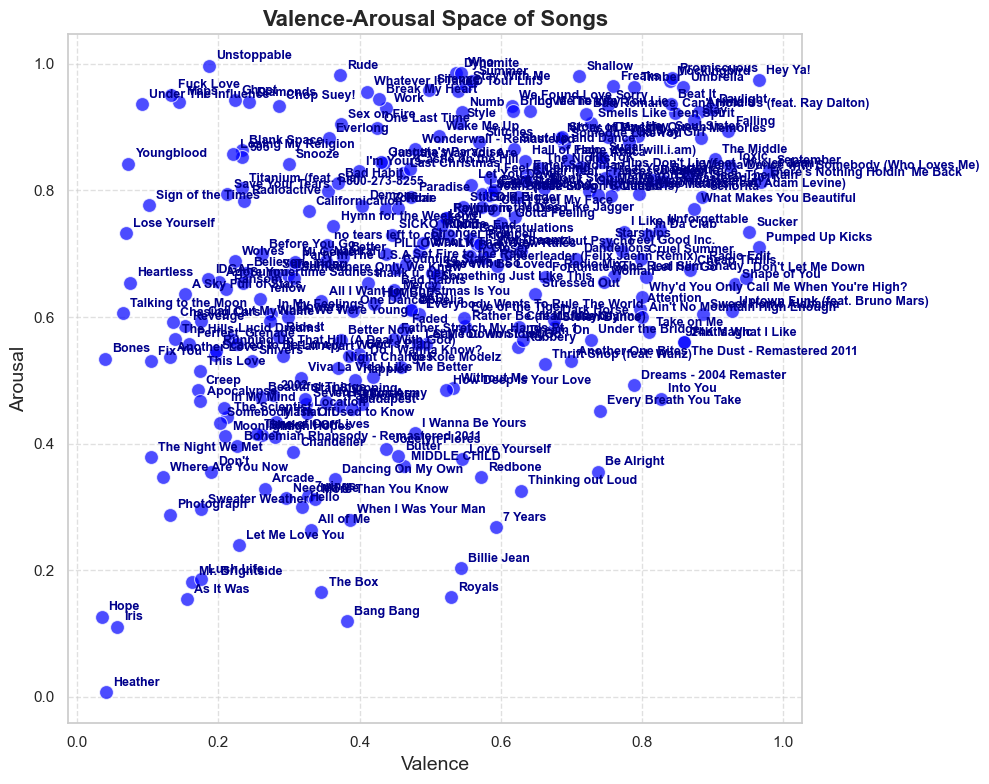

In [23]:
df = pd.DataFrame(track_details)

# Set up the plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.set(style="whitegrid")  # Set the style

# Create the scatter plot
scatter = sns.scatterplot(
    x='valence', 
    y='arousal', 
    data=df, 
    s=100,  # Size of the points
    color='blue',  # Color of the points
    alpha=0.7  # Transparency of the points
)

# Add labels to each point
for i, row in df.iterrows():
    plt.text(
        row['valence'] + 0.01,  # x-coordinate offset
        row['arousal'] + 0.01,  # y-coordinate offset
        row['track'],  # Song name
        fontsize=9,  # Font size
        fontweight='bold',  # Font weight
        color='darkblue'  # Text color
    )

# Add titles and labels
plt.title('Valence-Arousal Space of Songs', fontsize=16, fontweight='bold')
plt.xlabel('Valence', fontsize=14)
plt.ylabel('Arousal', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()